In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading dataset
data=pd.read_csv("C:\\Users\\Shabu\\Desktop\\Height.Weight,Age.csv")

In [3]:
# Printing first 10 rows of dataset
data.head(10)

,index,Height,Weight,Age
0,1,159,65,60.0
1,2,156,64,NaN
2,3,151,60,59.0
3,4,165,75,55.0
4,5,139,50,NaN
5,6,145,55,53.0
6,7,161,70,NaN
7,8,148,54,48.0
8,9,159,62,46.0
9,10,157,63,NaN


In [11]:
# Number of rows and columns in the dataset
data.shape

(20, 4)

In [4]:
# Overall information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   20 non-null     int64  
 1   Height  20 non-null     int64  
 2   Weight  20 non-null     int64  
 3   Age     13 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 768.0 bytes


In [12]:
# Name of the columns
data.columns

Index(['index ', 'Height', 'Weight', 'Age'], dtype='object')

In [6]:
# Statistically describing the dataset
data.describe()

,index,Height,Weight,Age
count,20.00000,20.00000,20.000000,13.000000
mean,10.50000,153.20000,60.700000,55.615385
std,5.91608,7.59224,5.956862,5.895457
min,1.00000,139.00000,50.000000,46.000000
25%,5.75000,147.50000,57.750000,53.000000
50%,10.50000,155.50000,61.000000,56.000000
75%,15.25000,159.00000,64.000000,59.000000
max,20.00000,165.00000,75.000000,67.000000


In [8]:
# Number of null values
data.isnull().sum()

index     0
Height    0
Weight    0
Age       7
dtype: int64

<AxesSubplot:>

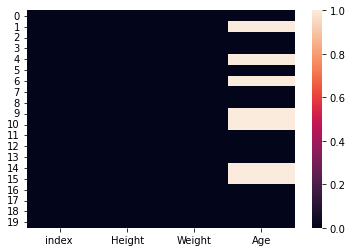

In [10]:
# Visualizing null values using heat map
sns.heatmap(data.isnull())

In [13]:
# Step 1
# Separating the null values and consider as test data
Test_data=data[data['Age'].isnull()]
Test_data

,index,Height,Weight,Age
1,2,156,64,NaN
4,5,139,50,NaN
6,7,161,70,NaN
9,10,157,63,NaN
10,11,155,64,NaN
14,15,160,60,NaN
15,16,149,58,NaN


In [14]:
# Step 2
# Dropping the null values and considering as train data set
data.dropna(inplace=True)
data

,index,Height,Weight,Age
0,1,159,65,60.0
2,3,151,60,59.0
3,4,165,75,55.0
5,6,145,55,53.0
7,8,148,54,48.0
8,9,159,62,46.0
11,12,145,58,56.0
12,13,140,51,62.0
13,14,150,59,58.0
16,17,159,63,57.0


In [15]:
#checking null values
data.isnull().sum()

index     0
Height    0
Weight    0
Age       0
dtype: int64

In [16]:
# Step 3
# Creating X_train and Y_train from the dataset
y_train=data['Age']
y_train

0     60.0
2     59.0
3     55.0
5     53.0
7     48.0
8     46.0
11    56.0
12    62.0
13    58.0
16    57.0
17    53.0
18    67.0
19    49.0
Name: Age, dtype: float64

In [19]:
# X_train is the dataset except the 'Age' column
X_train=data.drop('Age', axis=1)
X_train

,index,Height,Weight
0,1,159,65
2,3,151,60
3,4,165,75
5,6,145,55
7,8,148,54
8,9,159,62
11,12,145,58
12,13,140,51
13,14,150,59
16,17,159,63


In [22]:
# Step 4
# Building the model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [23]:
# Training the model
LR.fit(X_train,y_train)

LinearRegression()

In [24]:
# Step 5
# Creating X_test from Test_data
X_test=Test_data.drop("Age",axis=1)

In [26]:
X_test

,index,Height,Weight
1,2,156,64
4,5,139,50
6,7,161,70
9,10,157,63
10,11,155,64
14,15,160,60
15,16,149,58


In [27]:
# Step 6
# Applying the model and predicting the missing values
y_predict=LR.predict(X_test)

In [31]:
y_predict

array([55.260669  , 53.7674704 , 57.83374717, 55.39881867, 57.06025926,
       52.91358405, 56.43938628])

In [44]:
# Replacing the missing values by predicted values
Test_data['Age'].replace(['y_predict'])

1     55.260669
4     53.767470
6     57.833747
9     55.398819
10    57.060259
14    52.913584
15    56.439386
Name: Age, dtype: float64